# 1. Reading and understanding the data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import warnings

In [3]:
bike_data = pd.read_csv('day.csv')

In [4]:
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


## --> Data does not have any null values


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Get Unique values from all columns to see which columns has just one or useless values
for col in bike_data:
    print(col) 
    print(bike_data[col].unique())

instant
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

In [9]:
# Convert Seasonn column into categorical
#df['Education'].replace(['Under-Graduate', 'Diploma '],   [0, 1], inplace=True)
bike_data['season'].replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

In [10]:
# Convert weatherit column into categorical
bike_data['weathersit'].replace([1,2,3,4],['clear','misty','light rain or snow','Heavy rain or snow'],inplace=True)

In [11]:
# We do not need columns=['instant','casual','registered'])
bike_data=bike_data.drop(columns=['instant','casual','registered'])

# 3. Visualizing the data

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

AttributeError: 'AxesSubplot' object has no attribute 'show'

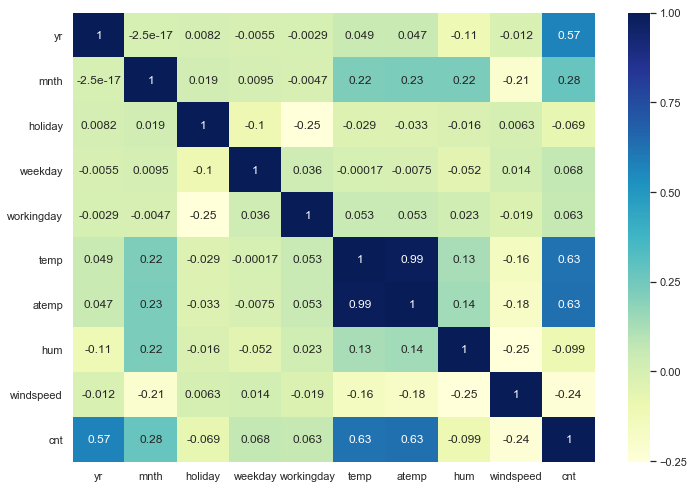

In [13]:
bike_data.corr()
dataplot = sns.heatmap(bike_data.corr(), cmap="YlGnBu", annot=True)
#displaying heatmap

dataplot.show()

### 3.1 Visualizing the numerical values


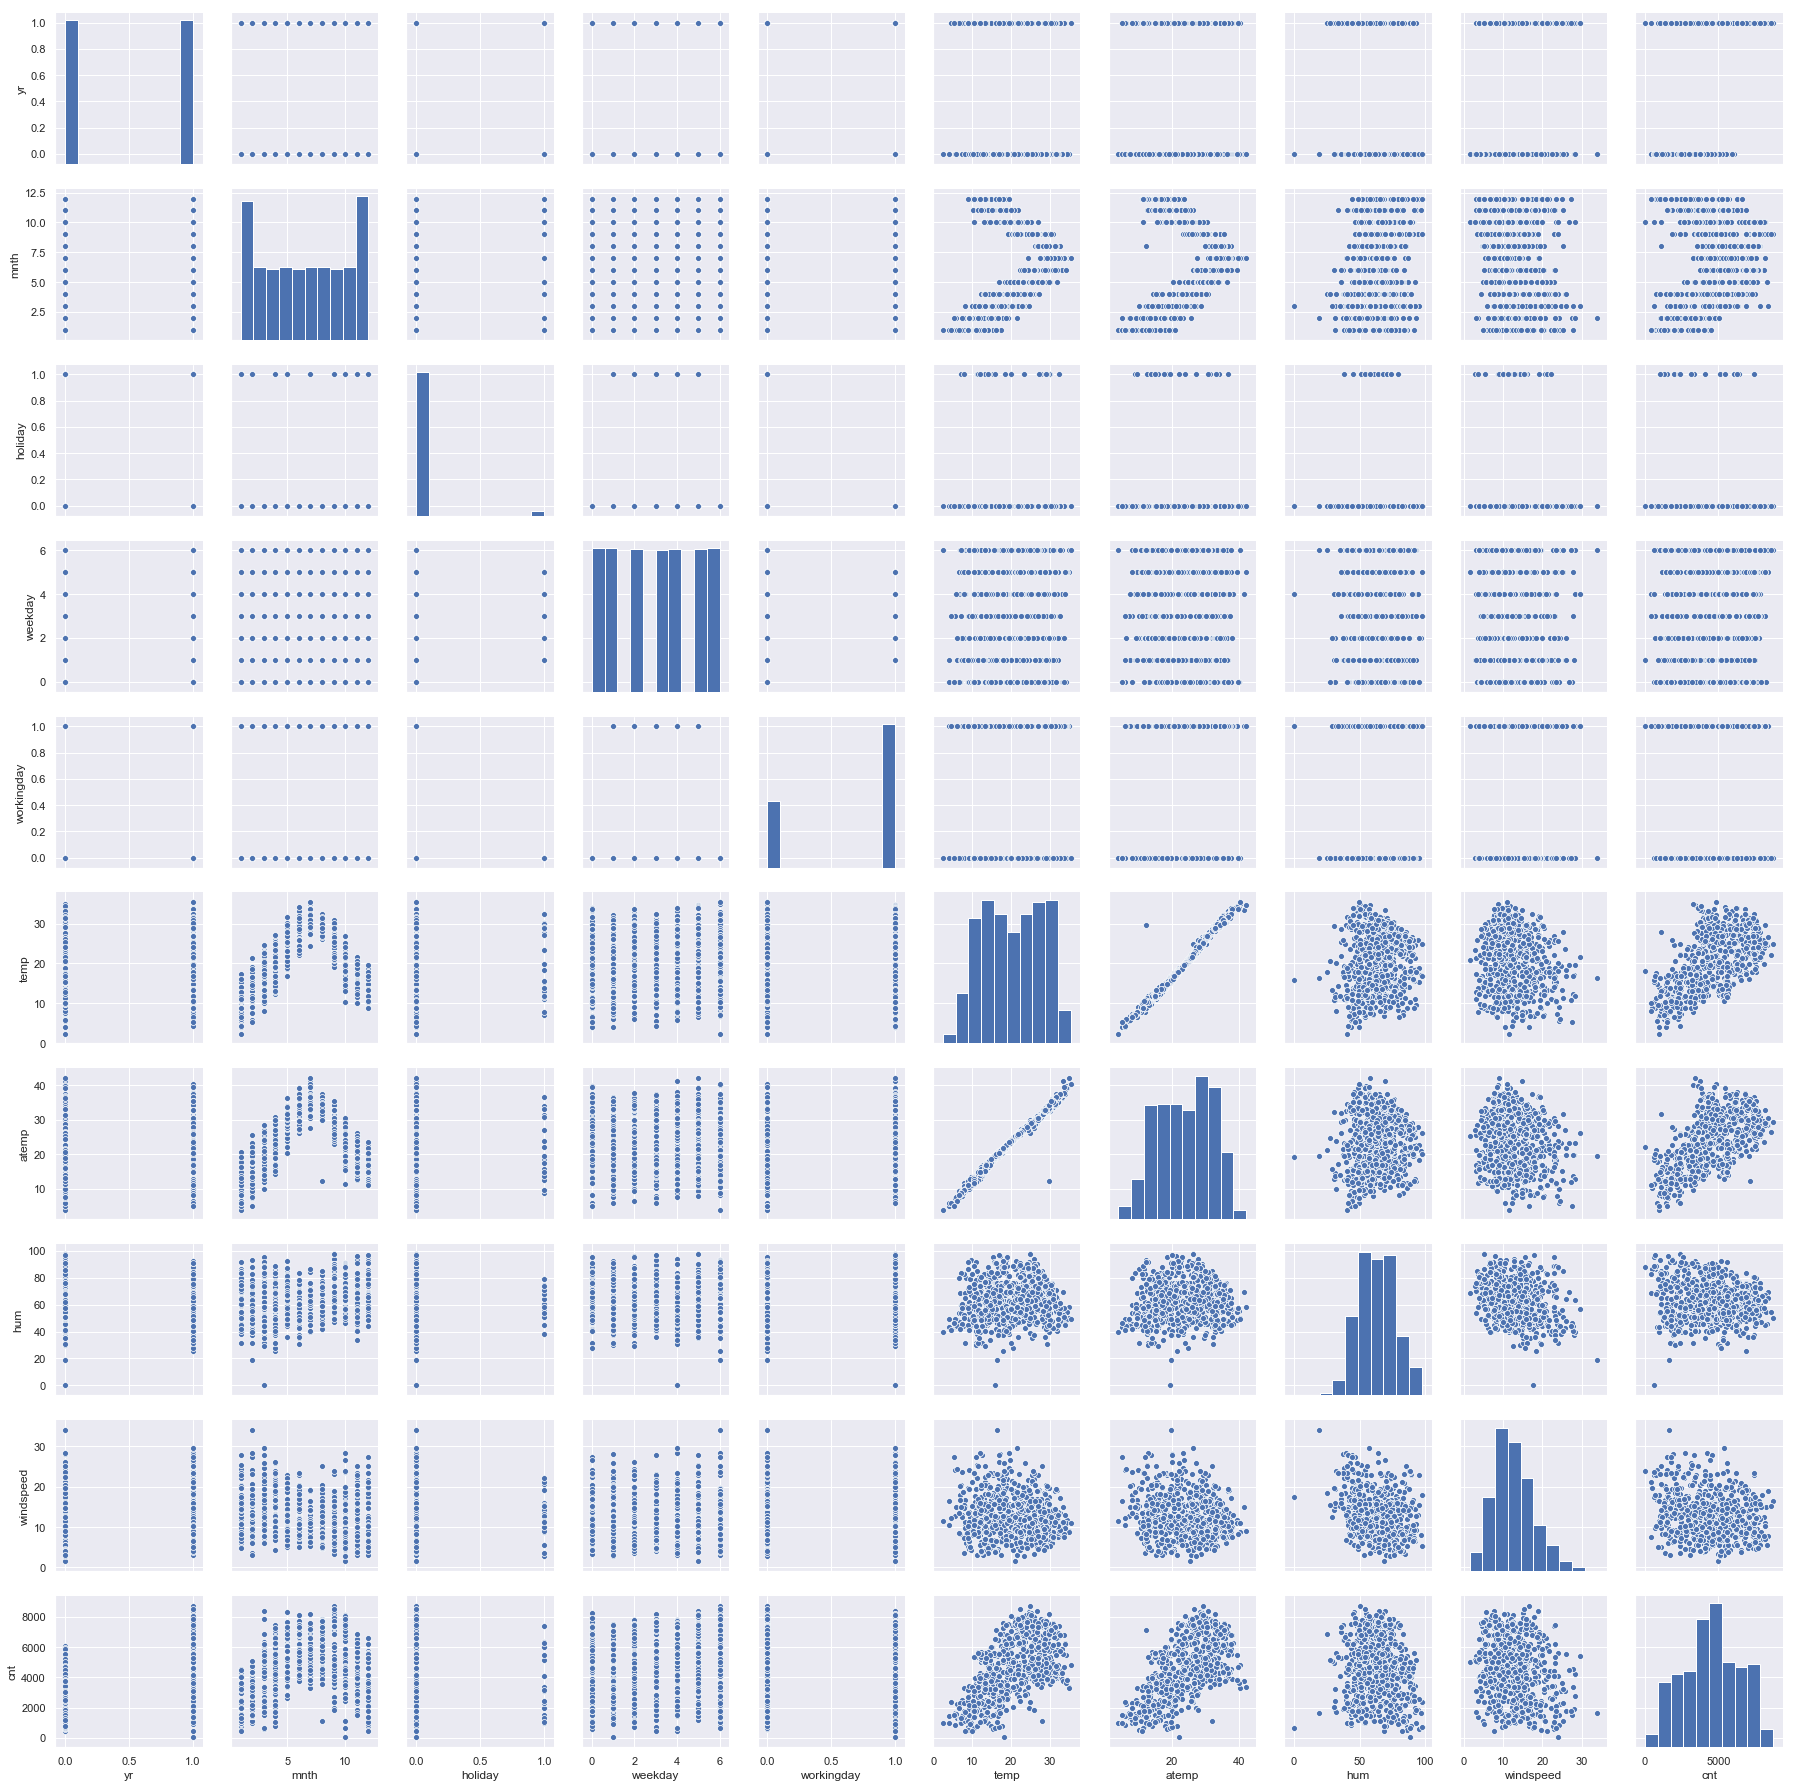

In [194]:
sns.pairplot(bike_data)
plt.show()

In [14]:
# temp and atemp looks highly correlated so lets consider only one ATemp 
bike_data=bike_data.drop(columns=['temp'])

In [15]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


### Visualising Categorical Variables


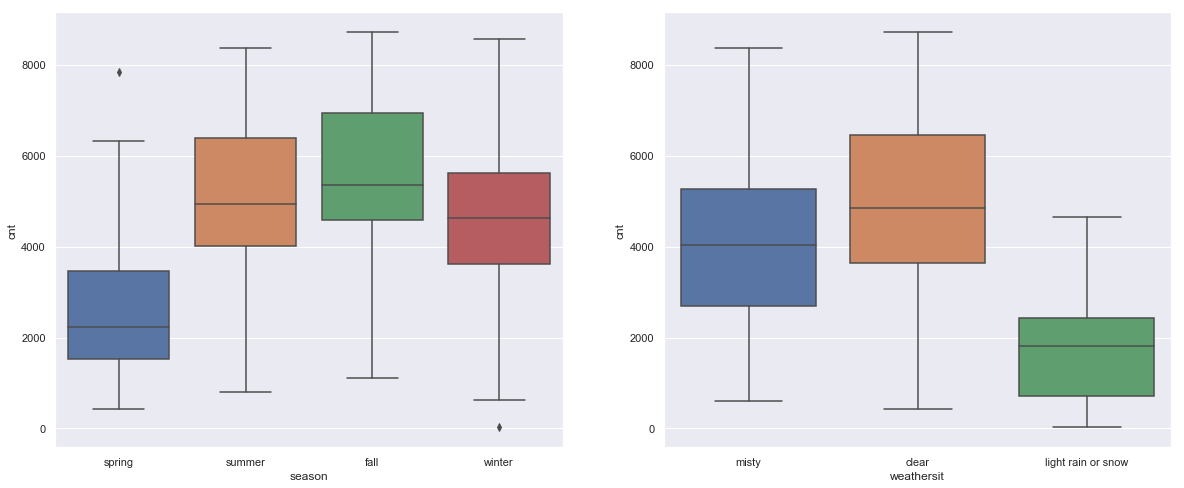

In [16]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)

plt.show()

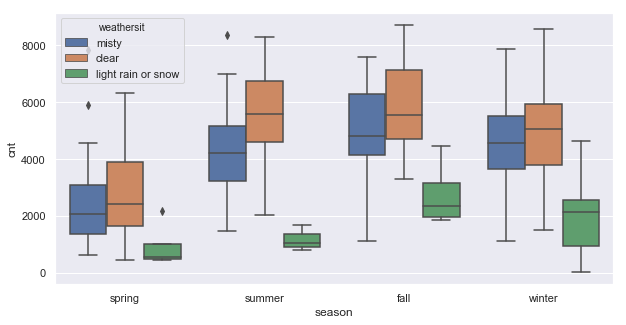

In [17]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike_data)
plt.show()

### This shows season and weathersit columns have significant impact on the count so should be converted to integer using dummy variables method


# Creating Dummy Variables


In [18]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(bike_data['season'])

In [19]:
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(bike_data['season'], drop_first = True)

In [21]:
# Add the results to the original housing dataframe

bike_data = pd.concat([bike_data, season], axis = 1)

In [22]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,01-01-2018,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985,1,0,0
1,02-01-2018,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801,1,0,0
2,03-01-2018,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,04-01-2018,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,05-01-2018,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [23]:
weathersit = pd.get_dummies(bike_data['weathersit'])

In [24]:
weathersit.head()

,clear,light rain or snow,misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
weathersit = pd.get_dummies(bike_data['weathersit'],drop_first = True)

In [26]:
bike_data = pd.concat([bike_data, weathersit], axis = 1)

In [27]:
bike_data = bike_data.drop(columns=['season','weathersit','dteday'])

#### Remove categorical Columns

In [28]:
bike_data.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain or snow,misty
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets


In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling of columns


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'cnt', 'windspeed','weekday','mnth']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Me\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Me\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain or snow,misty
653,1,0.818182,0,0.333333,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,1.000000,0,0.000000,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


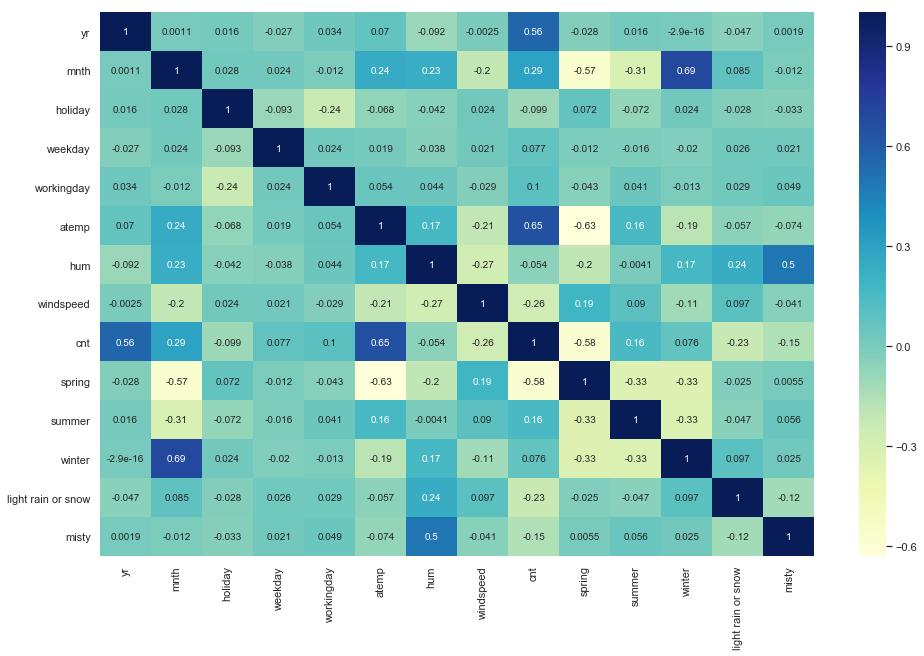

In [575]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### As you might have noticed, atemp seems to the correlated to price the most. Let's see a pairplot for atemp vs cnt.


### Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

Building Linear Model
Building our model¶
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light rain or snow', True, 1),
 ('misty', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light rain or snow', 'misty'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday', 'summer'], dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [41]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.18e-183
Time:                        22:28:56   Log-Likelihood:                 486.30
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     499   BIC:                            -904.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3077      0

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,22.24
3,atemp,13.42
5,windspeed,3.96
2,weekday,3.07
6,spring,2.52
9,misty,2.24
0,yr,2.05
7,winter,2.03
8,light rain or snow,1.21
1,holiday,1.05


'hum' and 'atemp' has high VIF. General guidance is to select Features having 5 or less than 5 VIF values. 
Lets create a new model by removing these features.

In [44]:
X_train_rfe = X_train_rfe.drop(['hum','atemp'], axis=1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [51]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.60e-147
Time:                        22:31:26   Log-Likelihood:                 395.52
No. Observations:                 510   AIC:                            -773.0
Df Residuals:                     501   BIC:                            -734.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5517      0

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.09
2,weekday,2.48
0,yr,1.77
4,spring,1.49
7,misty,1.47
5,winter,1.39
6,light rain or snow,1.08
1,holiday,1.04


In [472]:
#X_train_M1 = X_train_M1.drop(['const'], axis=1)

#Holiday and working day is having high p Value. Lets remove holiday and build model again.


### Residual Analysis of the train data¶



So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [55]:
y_train_cnt = lm1.predict(X_train_lm1)

In [56]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Me\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

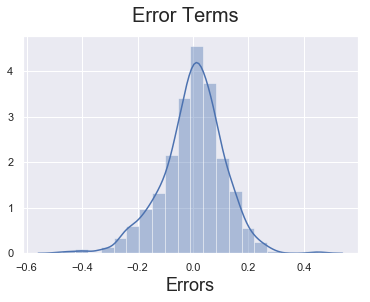

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

## Making Predictions

### Applying the scaling on the test sets

In [58]:
num_vars = ['atemp', 'hum', 'cnt', 'windspeed','weekday','mnth']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Me\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,spring,summer,winter,light rain or snow,misty
184,0,0.545455,1,0.166667,0,0.769660,0.657364,0.084219,0,0,0,0,1
535,1,0.454545,0,0.500000,1,0.842587,0.610133,0.153728,0,1,0,0,0
299,0,0.818182,0,0.666667,1,0.496145,0.837699,0.334206,0,0,1,0,1
221,0,0.636364,0,0.500000,1,0.795343,0.437098,0.339570,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.741471,0.314298,0.537414,0,1,0,0,0


In [61]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_rfe)
#X_train_rfe.head()

In [62]:
X_test_rfe.head()

,yr,holiday,weekday,windspeed,spring,winter,light rain or snow,misty
184,0,1,0.166667,0.084219,0,0,0,1
535,1,0,0.500000,0.153728,0,0,0,0
299,0,0,0.666667,0.334206,0,1,0,1
221,0,0,0.500000,0.339570,0,0,0,0
152,0,0,0.666667,0.537414,0,0,0,0


In [63]:
# Making predictions
y_pred = lm1.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

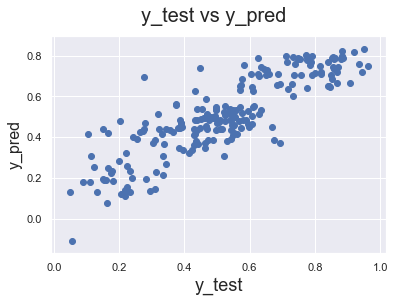

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)             

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7331239073602114